# 서울시에서 일어나는 범죄와 체감 안전도
: 강남 3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [186]:
import pandas as pd

In [187]:
crime_anal_police = pd.read_csv('../Data/crime_in_Seoul.csv', encoding='euc-kr')
crime_anal_police.head()


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [188]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [189]:
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [190]:
police_address = pd.read_csv('../Data/SeoulPoliceAddress.csv')
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [191]:
# Method 1

station_name =[]
# for name in crime_anal_police.관서명:
#     print(name[:-1])
#     station_name.append("서울" + name[:-1] + "경찰서")
station_name = "서울" + crime_anal_police.관서명.str[:-1] + "경찰서"
station_name


0      서울중부경찰서
1      서울종로경찰서
2     서울남대문경찰서
3     서울서대문경찰서
4      서울혜화경찰서
5      서울용산경찰서
6      서울성북경찰서
7     서울동대문경찰서
8      서울마포경찰서
9     서울영등포경찰서
10     서울성동경찰서
11     서울동작경찰서
12     서울광진경찰서
13     서울서부경찰서
14     서울강북경찰서
15     서울금천경찰서
16     서울중랑경찰서
17     서울강남경찰서
18     서울관악경찰서
19     서울강서경찰서
20     서울강동경찰서
21     서울종암경찰서
22     서울구로경찰서
23     서울서초경찰서
24     서울양천경찰서
25     서울송파경찰서
26     서울노원경찰서
27     서울방배경찰서
28     서울은평경찰서
29     서울도봉경찰서
30     서울수서경찰서
Name: 관서명, dtype: object

In [192]:
# Method 2

station_name =list("서울" + crime_anal_police.관서명.str[:-1] + "경찰서")
station_name


['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [193]:
# 경찰서 갯수 확인
len(station_name)

31

In [194]:
len(police_address)

31

In [195]:
police_address[["lat", "lng"]] = 0.0

In [196]:
import json
import urllib.request

client_id = "knyo4tcwfn"
client_secret = "GpwWAGlloYMUQhozeVUbtzSqKjxV5bgDmK1gYWMv"

ext = []
for i in range(len(police_address)):

    encText = urllib.parse.quote(police_address.loc[i, "주소"])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + \
        encText  # JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
    request.add_header("X-NCP-APIGW-API-KEY", client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data1 = json.loads(enText)
    try:
        police_address["lng"].iloc[i] = data1['addresses'][0]['x']
        police_address["lat"].iloc[i] = data1['addresses'][0]['y']
    except:
        ext.append(i)


/Volumes/Data/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [197]:
ext

[]

In [198]:
police_address.head()


,경찰관서,전화번호,FAX,주소,lat,lng
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.5635144,126.9896139
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.5755322,126.9849292
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.5548186,126.9735627
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.5649018,126.9667851
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.5718764,126.9989318


In [199]:
police_address.to_csv('../Data/SeoulPoliceAddress_latlng.csv', index=False)

In [200]:
pd.read_csv('../Data/SeoulPoliceAddress_latlng.csv').head()

,경찰관서,전화번호,FAX,주소,lat,lng
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.563514,126.989614
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.575532,126.984929
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.554819,126.973563
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.564902,126.966785
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.571876,126.998932


In [201]:
police_address['구별'] = [region.split()[1] for region in police_address['주소']]
police_address.head()

,경찰관서,전화번호,FAX,주소,lat,lng,구별
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.5635144,126.9896139,중구
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.5755322,126.9849292,종로구
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.5548186,126.9735627,중구
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.5649018,126.9667851,서대문구
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.5718764,126.9989318,종로구


In [202]:
# 2의 File에 경찰관서 동일한 이름인지 확인하기   : 글자와 순서가 동일하다는 뜻. 
len(station_name == police_address.경찰관서)

31

In [203]:
# 경찰서의 주소 중 '경찰관서'와 '관서명'이 순서가 같다.
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [204]:
# 구별 추가 1

gu_list = []
for i in range(len(crime_anal_police)):
    gu_list.append(police_address.주소[i].split()[1])
crime_anal_police['구별'] = gu_list
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [205]:
# 구별 추가 2

# gu_name = []
# for name in police_address['주소']:
#     temp = name.split()
#     temp_gu = [gu for gu in temp if gu[-1] == '구'][0]    # [0]은 리스트를 푸는 것 , 구로 끝나는 문자열만 temp_gu에 저장
#     # print(temp_gu)
# #     gu_name.append(temp_gu)

# crime_anal_police.구별 = gu_name
# crime_anal_police.head()


In [206]:
len(gu_list)

31

In [207]:
set(gu_list)

{'강남구',
 '강동구',
 '강북구',
 '관악구',
 '광진구',
 '구로구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [208]:
# list의 중복값 확인
len(set(gu_list))

23

In [209]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:, ['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [210]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재는 금천서는 금천구로 편성되어있음.
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",관악구


In [211]:
crime_anal_police[crime_anal_police['관서명'] == '금천서']
crime_anal_police.loc[crime_anal_police['관서명'] == '금천서',['구별']] ='금천구'
crime_anal_police[crime_anal_police['관서명'] == '금천서']


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",금천구


In [212]:
crime_anal_police[crime_anal_police['관서명'] == '강서서']
crime_anal_police.loc[crime_anal_police['관서명'] == '강서서', ['구별']] = '강서구'
crime_anal_police[crime_anal_police['관서명'] == '강서서']


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",강서구


In [213]:
# 확인
len(crime_anal_police['구별'].unique())

25

In [214]:
# csv저장
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv", index=False)

> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다.

In [215]:
len(crime_anal_police)

31

In [216]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [217]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
 11  구별      31 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.0+ KB


In [218]:
# 절도 발생,절도 검거,폭력 발생,폭력 검거 를 정수 타입으로 변환
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(",", "").astype(int)
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(",", "").astype(int)
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(",", "").astype(int)
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(",","").astype(int)

In [219]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [220]:
import numpy as np

In [221]:
# 구별로 데이터를 정리한다. 
crime_anal = pd.pivot_table(crime_anal_police, index="구별", aggfunc=np.sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [222]:
# 강간 검거	강간 발생	강도 검거	강도 발생	살인 검거	살인 발생
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

In [223]:
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [224]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']


crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다.

In [225]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다. 
# 강간검거율	강도검거율	살인검거율	절도검거율	폭력검거율

crime_anal.loc[crime_anal['강간검거율'] >= 100, "강간검거율"] = 100
crime_anal.loc[crime_anal['강도검거율'] >= 100, "강도검거율"] = 100
crime_anal.loc[crime_anal['살인검거율'] >= 100, "살인검거율"] = 100
crime_anal.loc[crime_anal['절도검거율'] >= 100, "절도검거율"] = 100
crime_anal.loc[crime_anal['폭력검거율'] >= 100, "폭력검거율"] = 100


In [226]:
# 2 
for i in list(crime_anal.columns)[5:]:
    crime_anal.loc[crime_anal[i] >= 100, i] =100

In [227]:
crime_anal.head(15)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [228]:
updateList = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for upd in updateList:
    crime_anal.loc[crime_anal[upd] > 100, [upd]] = 100

In [229]:
crime_anal[crime_anal.iloc[:,5:] > 100] = 100
crime_anal.head(15)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [230]:
# Column 이름 변경하기
crime_anal.rename(columns={'강간 발생' : '강간', '강도 발생': '강도', '살인 발생': '살인', '절도 발생': '절도','폭력 발생': '폭력'}, inplace=True)
crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


---
# 데이터의 정규화(Normalization)
- 강도와 살인은 두 자릿수이나 절도와 폭력은 4자리이다. 
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리하다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋습니다. 

In [231]:
# 머신러닝 모듈 사용하기
# sklearn의 preprocessing 기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [232]:
# 정규화를 진행할 컬럼 설정
col = ['강간', '강도','살인','절도','폭력']

In [233]:
# 정규화를 진행할 컬럼의 데이터 설정
x =crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [234]:
# 최대값과 최소값의 값 가져오기
min_max_scalar = preprocessing.MinMaxScaler()
min_max_scalar


MinMaxScaler()

In [235]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float설정
x_scaled =min_max_scalar.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [236]:
# 정규화된 범죄건수가 있는 새로운 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [237]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [238]:
result_CCTV = pd.read_csv("../Data/CCTV_Result.csv", index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [239]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [240]:
# 정규화된 범죄 발생건수를 합하여 범죄 칼럼 생성
crime_anal_norm['범죄'] = crime_anal_norm.iloc[:,:5].apply(sum, axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [241]:
# 검거율도 통합하여 칼럼 생성
crime_anal_norm['검거'] = crime_anal_norm.iloc[:, 5:10].apply(sum, axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


In [242]:
import matplotlib.pyplot as plt


In [243]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')  # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'  # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [244]:
import seaborn as sns

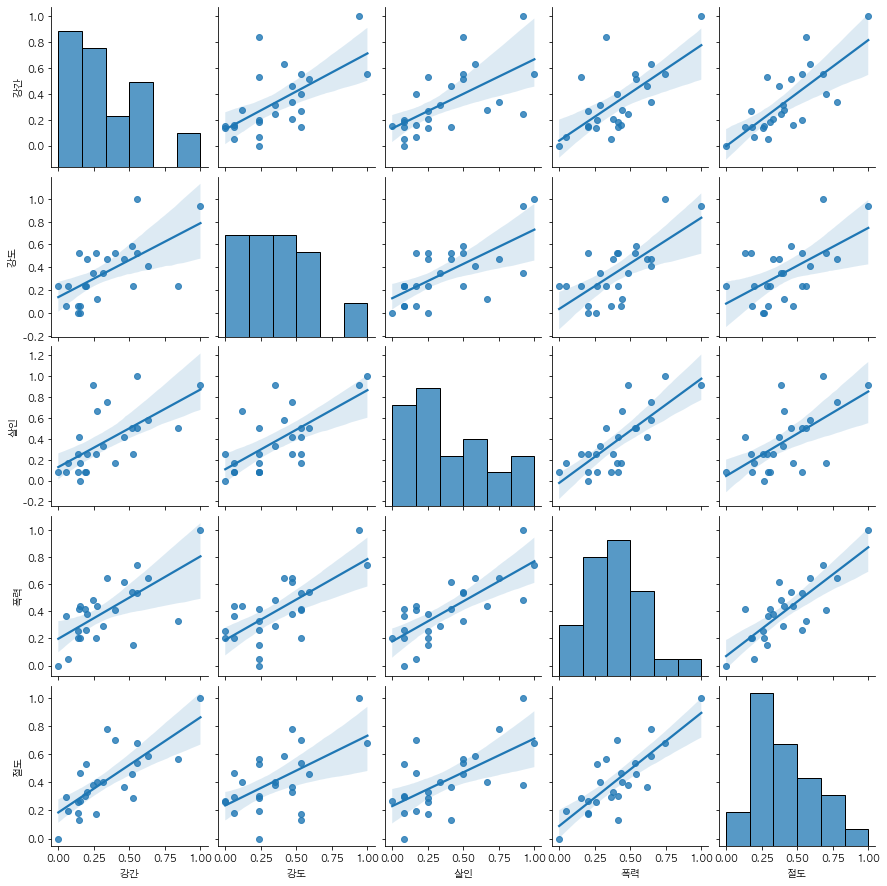

In [245]:
sns.pairplot(
    crime_anal_norm,
    vars=['강간', '강도', '살인', '폭력', '절도'],
    kind='reg'
)
plt.show()

> 5대 범죄 모두 양의 상관관계           
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생 건수도 많아진다. 

### CCTV와 살인, 강도에 대한 그래프

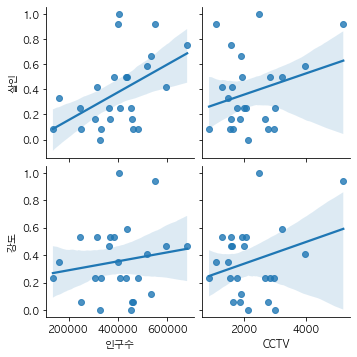

In [246]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수' , 'CCTV'],
    y_vars=['살인', '강도'],
    kind='reg'
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다.      
> 특히, 강도보다는 살인 발생수가 훨씬 많이 증가한다.        
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다.     
> 따라서 CCTV가 없을 때 살인사건 발생수가 증가한다.     

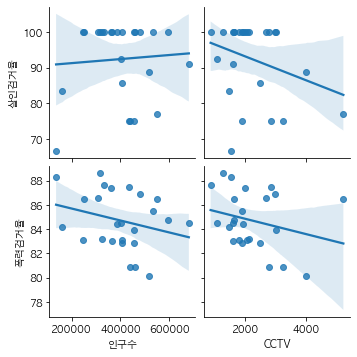

In [247]:
### 인구수, CCTV와 살인 검거율, 폭력 검거율을 회귀선으로 확인 후 Commnet
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수', 'CCTV'],
    y_vars=['살인검거율', '폭력검거율'],
    kind='reg'
)
plt.show()


> 살인검거율은 인구수와 거의 관계가 없음        
> 폭력 검거율과 인구수는 약한 음의 상관관계를 가짐      
> CCTV와 살인검거율은 높은 음의 상관관계를 가짐     
> CCTV와 폭력 검거율은 약한 음의 상관관계를 가짐        
> 따라서, 살인검거율이 높은 지역은 CCTV 개수가 적으며, 폭력 검거율이 높은 지역은 인구수와 CCTV 개수가 적다.         
> 인구수가 많아질수록 폭력 검거율은 낮아지고, 살인 검거율은 높아짐

---
### heatmap을 이용한 전체 검거율 확인

In [248]:
# 검거의 최대값 가져오기
tmp_max = crime_anal_norm['검거'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


In [249]:
# 범죄의 최대값 가져오기
c_max = crime_anal_norm['범죄'].max()
# 범죄의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5

# 검거율을 기준으로 정렬하기
c_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
c_sort.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.796747,3.545480
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,680883,1586,0.597564,3.681500
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,3.686223
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.530585,3.717073


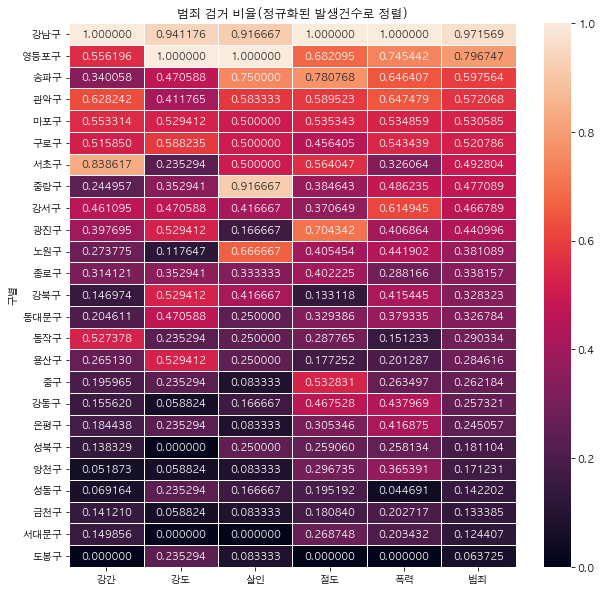

In [250]:
target_col = ['강간', '강도', '살인', '절도', '폭력','범죄']
plt.figure(figsize=(10, 10))
sns.heatmap(
    c_sort[target_col],
    annot=True,
    fmt='f',
    linewidths=0.5
)
plt.title('범죄 검거 비율(정규화된 발생건수로 정렬)')
plt.show()


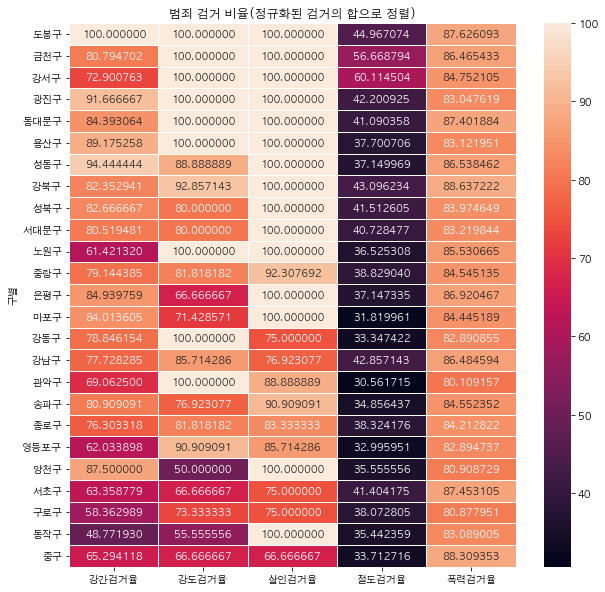

In [251]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt='f',
    linewidths=0.5
)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

> 절도검거율이 다른 검거율에 비해 매우 저조하다.        
> 검거율이 우수한 지역은 도봉구, 광진구, 성동구, 용산구 

In [252]:
### heatmap을 이용한 범죄 발생율 확인


In [253]:
# 져장
crime_anal_norm.to_csv('../Data/seoul_crime_norm.csv')

# 지도출력

In [254]:
import json
import folium

In [255]:
geo_path = '../Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [256]:
# 살인 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles="Stamen Toner"
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, "살인"],
    fill_color="PuRd",
    key_on="feature.id"
).add_to(map)

map

In [257]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 1000000    # 10만명 당 범죄 발생 비율

# 검거의 최대값 가져오기
tmp_max = crime_anal_norm['범죄'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['범죄율'] = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄율', ascending=False)
crime_anal_norm_sort.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,범죄율
구별,,,,,,,,,,,,,,,
종로구,0.314121,0.352941,0.333333,0.402225,0.288166,76.303318,81.818182,83.333333,38.324176,84.212822,161984,1471,0.338157,3.639918,2.087596
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.796747,3.545480,1.968413
중구,0.195965,0.235294,0.083333,0.532831,0.263497,65.294118,66.666667,66.666667,33.712716,88.309353,136469,1544,0.262184,3.206495,1.921199
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074,1.766816
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.530585,3.717073,1.374268


In [258]:
# 살인 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles="Stamen Toner"
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, "범죄율"],
    fill_color="PuRd",
    key_on="feature.id"
).add_to(map)

map
